# Seaborn: statistical data visualization

In [2]:

import pandas as pd
# Import the air quality dataset 

CO2Data = pd.read_csv("../Modelab-Python/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

print(CO2Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

- Load libs and set figure

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 

#create your own color array (viridis)
my_colors = ["#5ec962", "#3b528b"]

# add color array to set_palette
sns.set(font_scale=2, style="ticks", palette= my_colors)

- plot boxplot with Catplot in Seaborn

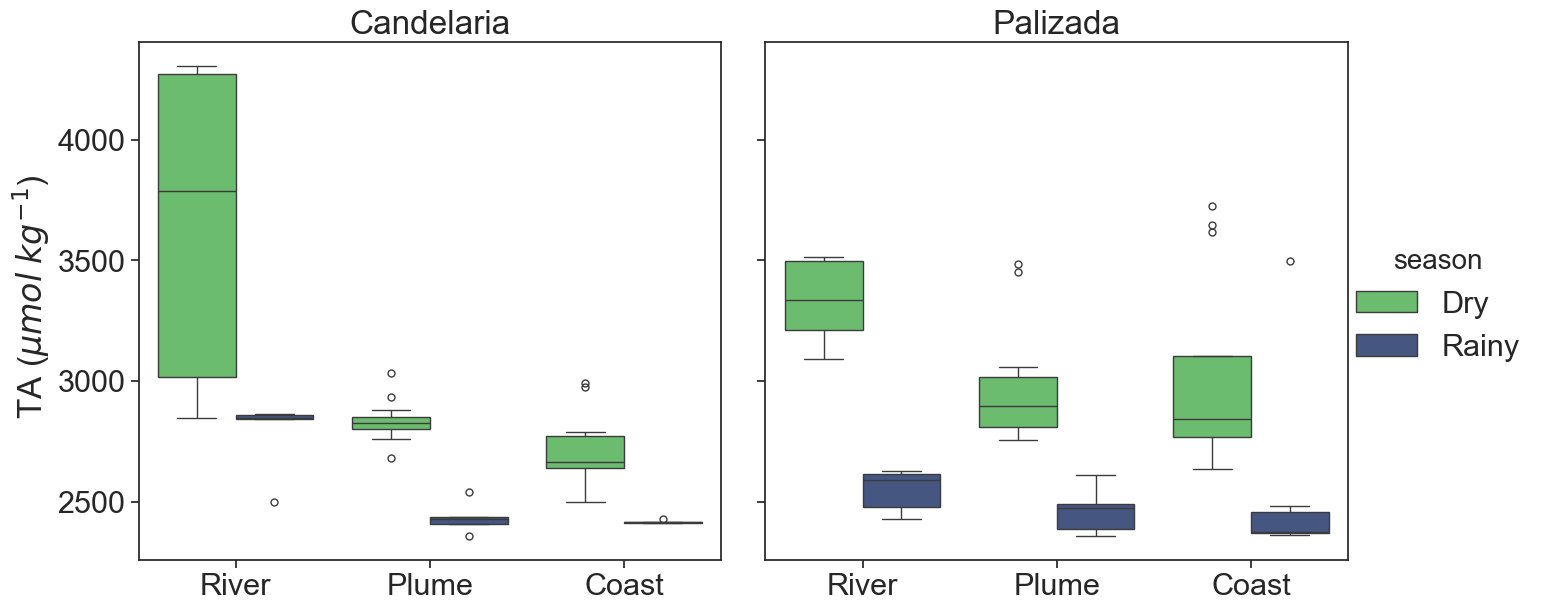

In [5]:
ax = sns.catplot(data=CO2Data,
                 x="area", y="ta_micromol_kg",
                hue="season", col="estuary",
                kind="box", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()


- plot a violin with Catplot in Seaborn

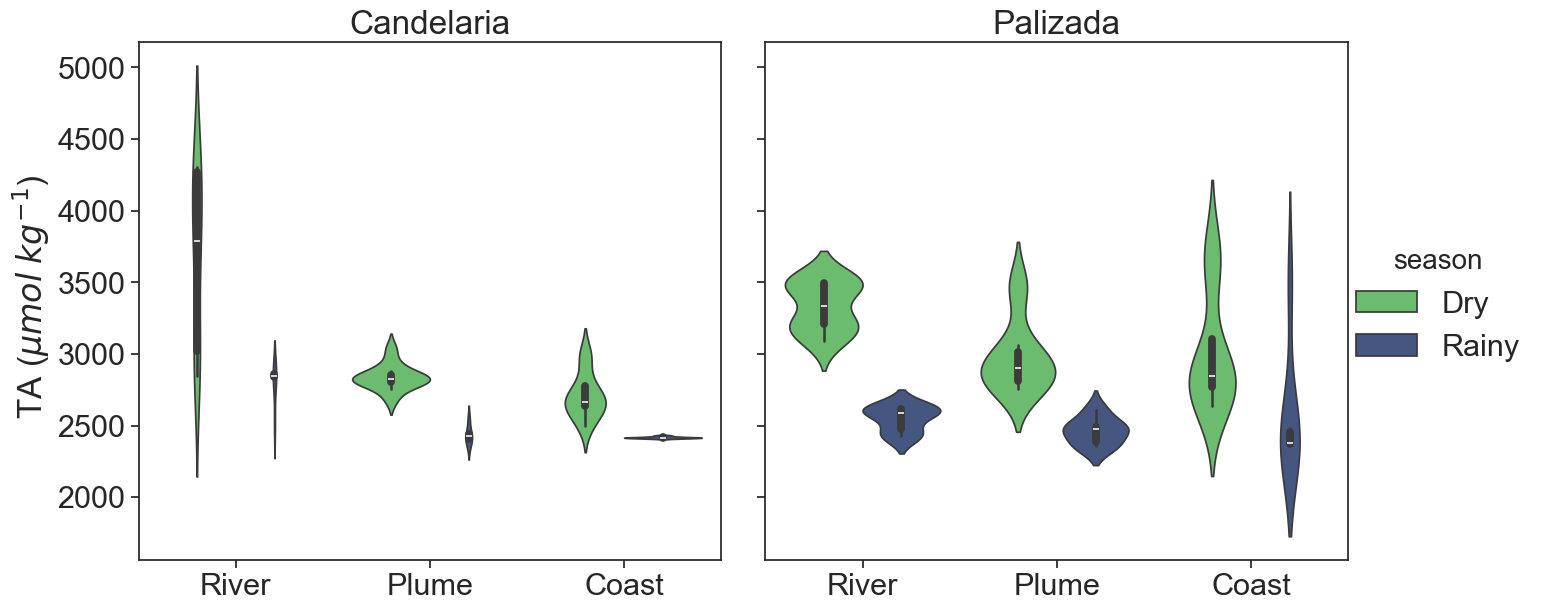

In [6]:
ax = sns.catplot(data=CO2Data, 
                x="area", y="ta_micromol_kg",
                hue="season", col="estuary", 
                kind="violin", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

- Plotting a three-way ANOVA

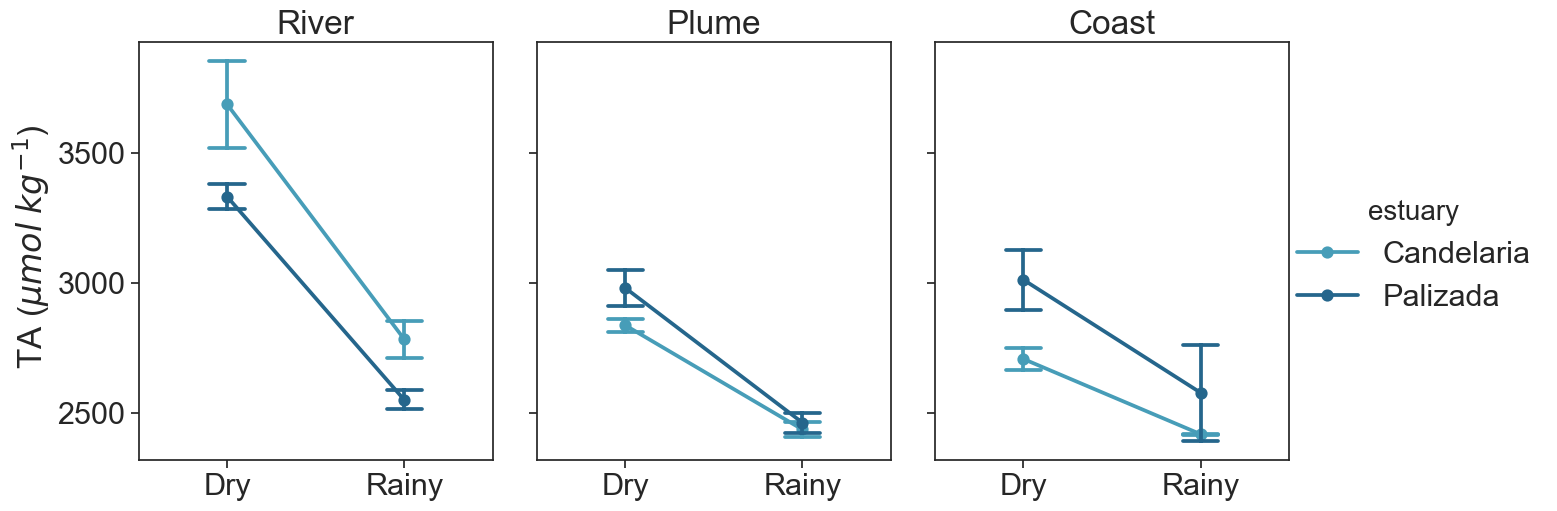

In [7]:
# Draw a pointplot to show pulse as a function of three categorical factors
ax = sns.catplot(
    data=CO2Data, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)

ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

- Scatterplots DIC vs Salinity by Estuary

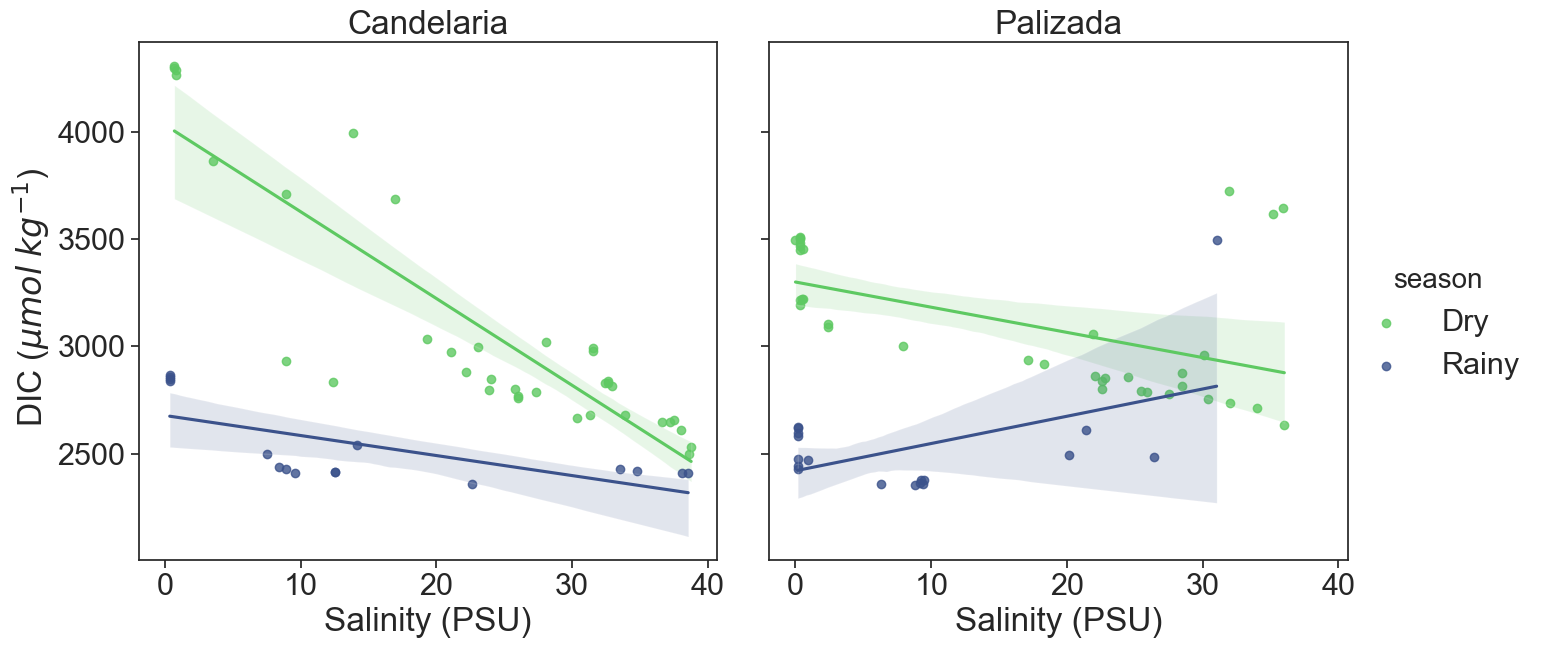

In [8]:
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",
                hue="season",col="estuary",
                data=CO2Data, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

## Exercise

- How can you modify the units of the figures?

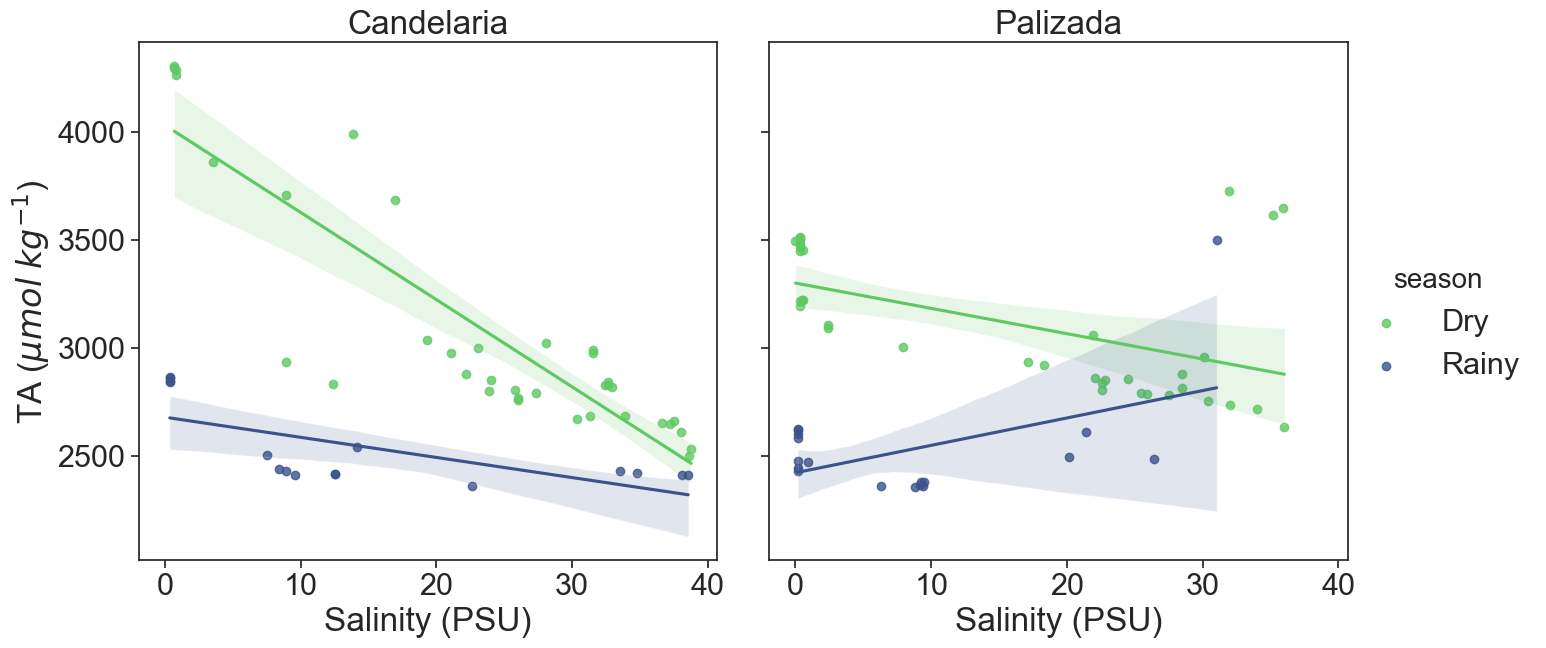

In [9]:
# Create a linear model plot grouped by 'season' and separated by 'estuary'
ax = sns.lmplot(
    x="sal_psu",                 # X-axis: salinity
    y="ta_micromol_kg",          # Y-axis: total alkalinity
    hue="season",                # Color by season
    col="estuary",               # One plot per estuary
    data=CO2Data,                # Data source
    height=7,                    # Height of each plot (in inches)
    aspect=1                     # Aspect ratio (width = height * aspect)
)

# Set axis labels with proper scientific units
ax.set(
    xlabel='Salinity (PSU)',
    ylabel='TA ($\mu mol \; kg^{-1}$)'
)

# Set titles for subplots based on column names
ax.set_titles(col_template="{col_name}", row_template="{row_name}")

# Customize legend title font size
plt.setp(ax._legend.get_title(), fontsize=20)

# Remove top and right spines for a cleaner look
sns.despine(top=False, right=False)

# Display the plot
plt.show()

 - Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data.

### Plotting a BSH data timeseries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the BSH CPUE standardized dataset 
BSHData = pd.read_csv("../Data/BSH_CPUE_BPM_SST_index_CV_norm_res.csv")

print(BSHData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             68 non-null     int64  
 1   NomCPUE          68 non-null     float64
 2   StdCPUE          68 non-null     float64
 3   SE               68 non-null     float64
 4   CV               68 non-null     float64
 5   LCI95            68 non-null     float64
 6   UCI95            68 non-null     float64
 7   CI_method        68 non-null     object 
 8   SclNomCPUE       68 non-null     float64
 9   sclStdCPUE       68 non-null     float64
 10  SclSE            68 non-null     float64
 11  SclSEmin         68 non-null     float64
 12  SclSEmax         68 non-null     float64
 13  SclLCI95         68 non-null     float64
 14  SclUCI95         68 non-null     float64
 15  mean_sclStdCPUE  68 non-null     int64  
 16  Model            68 non-null     object 
dtypes: float64(13), in

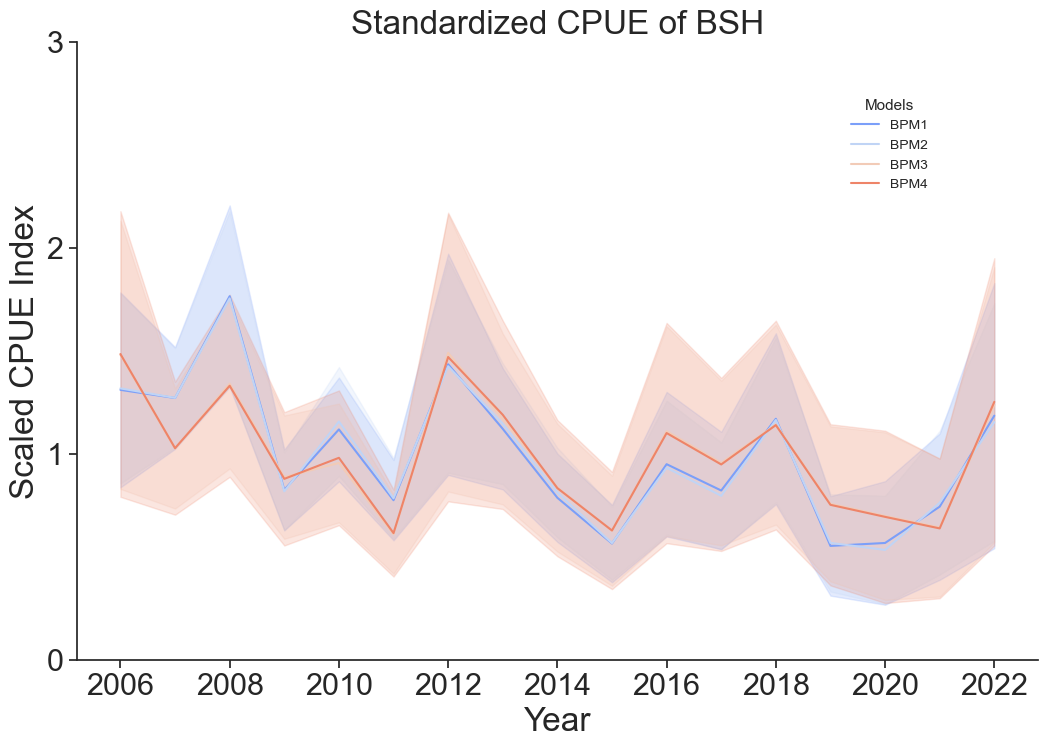

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose colors from Seaborn's coolwarm palette
palette = sns.color_palette("coolwarm", n_colors=len(BSHData["Model"].unique()))
model_names = BSHData["Model"].unique()
plt.figure(figsize=(11, 8))

# Iterate through each model and apply a unique color
for i, model_name in enumerate(model_names):
    data_model = BSHData[BSHData["Model"] == model_name]
    color = palette[i]

    # Line plot
    sns.lineplot(data=data_model, x="Year", y="sclStdCPUE", label=f"{model_name}", color=color)

    # Confidence band
    plt.fill_between(
        data_model["Year"],
        data_model["SclLCI95"],
        data_model["SclUCI95"],
        alpha=0.2,
        color=color
    )

plt.title("Standardized CPUE of BSH")
plt.xlabel("Year")
plt.ylabel("Scaled CPUE Index")

# Y-axis: ticks from 0 to 3 in steps of 1
plt.yticks(range(0, 4, 1))

# Smaller, positioned legend
plt.legend(
    title="Models",
    loc=(0.80, 0.75),
    fontsize=10,
    title_fontsize=11,
    frameon=False
)

# Remove top and right borders
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.grid(False)
plt.tight_layout()
plt.show()